In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Dense
import io
from tensorflow.keras.optimizers.legacy import Adam



In [ ]:
# loading the data
from google.colab import files
uploaded = files.upload()

Saving Yeti Analytics.xlsx to Yeti Analytics.xlsx


In [ ]:
# Step 1: Load the dataset
df = pd.read_excel('Yeti Analytics.xlsx')
df



,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


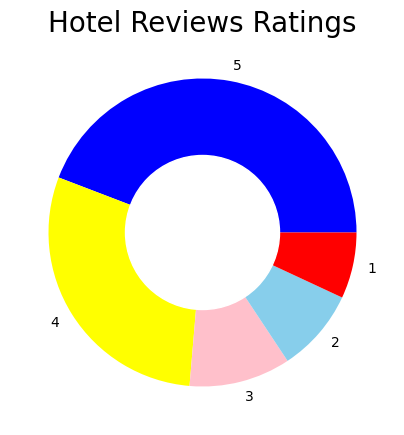

In [ ]:
import matplotlib.pyplot as plt
ratings = df["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["Blue", "yellow", 'Pink', "Skyblue", "red"]
plt.figure(figsize=(5,5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

In [ ]:
df['Review'] = df['Review'].str.lower()


<Axes: >

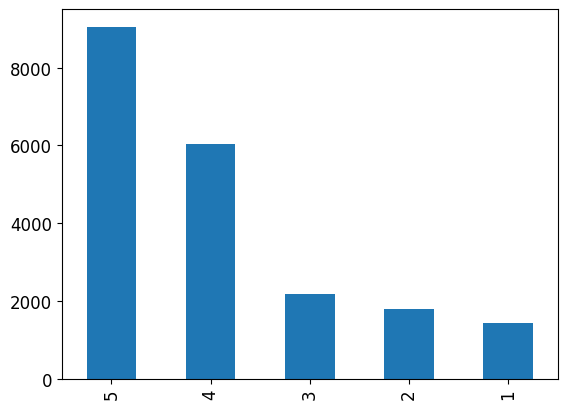

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df['Rating'].value_counts().plot(kind='bar')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=0d0985c7cc065cb54e798f9de59b0c74bebca041d6ca6852b8c365926a2c9728
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15721 sha256=62675adead9c5199a7e3fc93461248b0aa2693d0504f19740aafaca7e611eeaf
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling charde

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=d1944fb8dfbbc5459f4d2984b4aefc7430f43ceb03e0a0b5377e2d60d0c36308
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji


In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from langdetect import detect
from googletrans import Translator
import emoji
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sentiments
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer




In [ ]:
# Segmentation - Splitting text into individual tokens
# Removing punctuation and special characters
import nltk
from nltk.stem import WordNetLemmatizer
text_column = df['Review']
tokens = [word_tokenize(Review) for Review in text_column]

In [ ]:
# Removing punctuation and special characters
tokens = [[word for word in Review if word.isalnum()] for Review in tokens]

In [ ]:
# Normalization - Converting tokens to lowercase and lemmatization
lemmatizer = WordNetLemmatizer()
normalized_tokens = [[lemmatizer.lemmatize(token.lower()) for token in Review] for Review in tokens]

In [ ]:
# Print the normalized tokens
for i in range(5):
    print("Normalized Tokens:", normalized_tokens[i])


Normalized Tokens: ['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'review', 'did', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillow', 'not', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morning', 'loud', 'bang', 'door', 'opening', 'closing', 'hear', 'people', 'talking', 'hallway', 'maybe', 'just', 'noisy', 'neighbor', 'aveda', 'bath', 'product', 'nice', 'did', 'not', 'goldfish', 'stay', 'nice', 'touch', 'taken', 'advantage', 'staying', 'longer', 'location', 'great', 'walking', 'distance', 'shopping', 'overall', 'nice', 'experience', 'having', 'pay', '40', 'parking', 'night']
Normalized Tokens: ['ok', 'nothing', 'special', 'charge', 'diamond', 'member', 'hilton', 'decided', 'chain', 'shot', '20th', 'anniversary', 'seattle', 'start', 

_______________________

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,SimpleRNN


In [ ]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the maximum number of words to keep in the vocabulary
max_words = 10000

# Initialize the tokenizer with the maximum number of words
tokenizer = Tokenizer(num_words=max_words,oov_token="<OOV>")

# Fit the tokenizer on the reviews
tokenizer.fit_on_texts(df['Review'])

# Convert the reviews to sequences of integers
sequences = tokenizer.texts_to_sequences(df['Review'])

# Print the first few sequences to make sure the conversion is correct
print(sequences[:5])
#print(tokenizer.word_index)this is used to check which index is given to which word.
vocab_size = len(tokenizer.word_index)+1
vocab_size #(This is used to know what is the vocabulary length)

[[12, 2, 185, 233, 37, 7, 260, 9, 2, 909, 109, 247, 195, 101, 742, 513, 75, 10, 769, 233, 59, 419, 158, 35, 297, 426, 3299, 52, 3, 3, 23, 12, 176, 50, 56, 2179, 5711, 5197, 204, 566, 4, 4431, 25, 469, 434, 3, 18, 89, 622, 1, 572, 1770, 2504, 389, 33, 1189, 1464, 431, 11, 378, 3104, 3221, 312, 1583, 12, 10, 4, 7561, 9, 12, 501, 465, 1122, 136, 884, 15, 5, 104, 215, 187, 111, 12, 86, 184, 194, 803, 233, 18], [149, 146, 280, 341, 1654, 898, 509, 371, 992, 3105, 2591, 909, 537, 387, 72, 179, 232, 206, 400, 3268, 4, 179, 439, 47, 277, 2, 3, 101, 3106, 365, 57, 1064, 131, 142, 25, 189, 1979, 4040, 57, 1249, 122, 765, 1104, 534, 3268, 3676, 400, 1280, 63, 22, 37, 4494, 2110, 3318, 635, 3, 47, 439, 1428, 3676, 1105, 179, 42, 21, 9, 401, 1843, 4495, 5495, 1377, 3676, 1451, 412, 400, 989, 895, 1, 787, 179, 1789, 400, 365, 3268, 1132, 209, 3506, 365, 7115, 400, 57, 338, 1716, 10, 4, 3995, 4496, 1377, 989, 49, 412, 7320, 10, 4, 2261, 989, 1693, 626, 425, 1163, 412, 29, 8, 4635, 3375, 4, 41, 138, 5

52214

In [ ]:
#This is how we can check what is the max length of the sequence!
maxlen = max(len(seq) for seq in sequences)
print("Maximum sequence length:", maxlen)

Maximum sequence length: 2012


In [ ]:
#apply padding
padded_sequences = pad_sequences(sequences, maxlen=2012, padding='post', truncating='post')
len(padded_sequences)

20491

In [ ]:
X =padded_sequences
y = df['Rating'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
max_index = np.max(X)
print("Maximum index value:", max_index)

Maximum index value: 9999


In [ ]:
X =padded_sequences
y = df['Rating'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=9999, output_dim=32, input_length=2012))
model.add(SimpleRNN(30))
model.add(Dense(1, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2012, 32)          319968    
                                                                 
 simple_rnn (SimpleRNN)      (None, 30)                1890      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 321,889
Trainable params: 321,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Example of preprocessing to limit index values
X_processed = np.where(X >= vocab_size, vocab_size - 1, X)


In [ ]:
# Confirm indices are within the expected range
out_of_range_indices = [index for index in np.ravel(X_processed) if index >= vocab_size]
print("Out of range indices:", out_of_range_indices)


Out of range indices: []


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,SimpleRNN,Bidirectional,Dropout

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=73, output_dim=32, input_length=13))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 13, 32)            2336      
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 27,233
Trainable params: 27,233
Non-trainable params: 0
_________________________________________________________________


In [ ]:
df = df.fillna('0')
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
df['Review_1'] = df['Review'].str.replace(r"\d+|\W|\_",' ',regex=True)
df

,Review,Rating,Review_1
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monac...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game aweso...
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time staying charm not ...
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,ok just looks nice modern outside desk staff ...
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...


Stemeer

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
## Remove tenses of all words and make it simpler tense

def stem_text(text):
    y = []

    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

df['Review_1'] = df['Review_1'].apply(stem_text)

In [ ]:
df

,Review,Rating,Review_1
0,nice hotel expensive parking got good deal sta...,4,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,2,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room not experi hotel monaco seattl good ...
3,"unique, great stay, wonderful time hotel monac...",5,uniqu great stay wonder time hotel monaco loca...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time stay charm not star c...
20487,great location price view hotel great quick pl...,4,great locat price view hotel great quick place...
20488,"ok just looks nice modern outside, desk staff ...",2,ok just look nice modern outsid desk staff n t...
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruin vacat hotel open sept guest w...


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score

In [ ]:
# Load and preprocess data
df = pd.read_excel('Yeti Analytics.xlsx')  # Load the data from an Excel file
X = df['Review']  # Extract the input (text reviews)
y = df['Rating']  # Extract the output (ratings)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the data into training and test sets


In [ ]:
# Tokenize the text
tokenizer = Tokenizer()  # Create a tokenizer object
tokenizer.fit_on_texts(X_train)  # Fit the tokenizer on the training text data

In [ ]:
# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)  # Convert the training text data to sequences
X_test_sequences = tokenizer.texts_to_sequences(X_test)  # Convert the test text data to sequences


In [ ]:
# Pad sequences
max_length = max(max(len(seq) for seq in X_train_sequences), max(len(seq) for seq in X_test_sequences))  # Find the maximum length of the sequences
X_train_sequences = pad_sequences(X_train_sequences, maxlen=max_length)  # Pad the training sequences to have a uniform length
X_test_sequences = pad_sequences(X_test_sequences, maxlen=max_length)  # Pad the test sequences to have a uniform length

In [ ]:

# Encode labels
label_encoder = LabelEncoder()  # Create a label encoder object
y_train = label_encoder.fit_transform(y_train)  # Fit and transform the training labels
y_test = label_encoder.transform(y_test)  # Transform the test labels

In [ ]:
num_classes = len(label_encoder.classes_)  # Get the number of classes
y_train_categorical = to_categorical(y_train, num_classes)  # Convert the training labels to categorical format
y_test_categorical = to_categorical(y_test, num_classes)  # Convert the test labels to categorical format

In [ ]:
# Build and train the model
model = Sequential()  # Create a sequential model
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))  # Add an embedding layer
model.add(Bidirectional(LSTM(64)))  # Add a bidirectional LSTM layer
model.add(Dense(num_classes, activation='softmax'))  # Add a dense layer with softmax activation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compile the model
model.fit(X_train_sequences, y_train_categorical, epochs=5, batch_size=64, validation_split=0.2, callbacks=[EarlyStopping(patience=3)])  # Train the model

Epoch 1/5
205/205 [==============================] - 695s 3s/step - loss: 1.1301 - accuracy: 0.5010 - val_loss: 0.9553 - val_accuracy: 0.5566
Epoch 2/5
205/205 [==============================] - 693s 3s/step - loss: 0.8308 - accuracy: 0.6322 - val_loss: 0.9381 - val_accuracy: 0.5807
Epoch 3/5
205/205 [==============================] - 689s 3s/step - loss: 0.6266 - accuracy: 0.7363 - val_loss: 0.9683 - val_accuracy: 0.5834
Epoch 4/5
205/205 [==============================] - 734s 4s/step - loss: 0.4532 - accuracy: 0.8277 - val_loss: 1.1599 - val_accuracy: 0.5624
Epoch 5/5
205/205 [==============================] - 700s 3s/step - loss: 0.3239 - accuracy: 0.8850 - val_loss: 1.3053 - val_accuracy: 0.5752


In [ ]:
import numpy as np
import pandas as pd
import string
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import average_precision_score, precision_recall_curve
#from funcsigs import signature
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
data = pd.read_excel('Yeti Analytics.xlsx')
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
data.columns

Index(['Review', 'Rating'], dtype='object')

In [ ]:
data.describe

<bound method NDFrame.describe of                                                   Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]>

In [ ]:
data.info

<bound method DataFrame.info of                                                   Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]>

Making another column as bad review for checking

In [ ]:
data["is_bad_review"] = data["Rating"].apply(lambda x: 1 if x < 4 else 0)
reviews_df = data[["Review", "is_bad_review"]]
reviews_df

,Review,is_bad_review
0,nice hotel expensive parking got good deal sta...,0
1,ok nothing special charge diamond member hilto...,1
2,nice rooms not 4* experience hotel monaco seat...,1
3,"unique, great stay, wonderful time hotel monac...",0
4,"great stay great stay, went seahawk game aweso...",0
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",0
20487,great location price view hotel great quick pl...,0
20488,"ok just looks nice modern outside, desk staff ...",1
20489,hotel theft ruined vacation hotel opened sept ...,1


Review data is sample in order to speed up computations

In [ ]:
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)

Remove 'No Negative' or 'No Positive' from text

In [ ]:
reviews_df["Review"] = reviews_df["Review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

Cleaning text

In [ ]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
def clean_text(text):
    text = text.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]  # tokenize text and remove puncutation
    text = [word for word in text if not any(c.isdigit() for c in word)]  # remove words that contain numbers
    stop = stopwords.words('english')  # remove stop words
    text = [x for x in text if x not in stop]  # remove empty tokens
    text = [t for t in text if len(t) > 0]
    pos_tags = pos_tag(text)   # pos tag text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]  # lemmatize text
    text = [t for t in text if len(t) > 1] # remove words with only one letter
    text = " ".join(text)
    return(text)

reviews_df["review_clean"] = reviews_df["Review"].apply(lambda x: clean_text(x))

Adding Sentiment analysis columns

In [ ]:
sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["Review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

Feautre engineering

Add the characters column and words column

In [ ]:
reviews_df["nb_chars"] = reviews_df["Review"].apply(lambda x: len(x))
reviews_df["nb_words"] = reviews_df["Review"].apply(lambda x: len(x.split(" ")))

Create doc2vec vector columns

In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

tf-idf columns

In [ ]:
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [ ]:
reviews_df

,Review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,...,word_year,word_yell,word_yellow,word_yes,word_yogurt,word_york,word_you,word_you__ã,word_young,word_yummy
10726,not recommend hotel did reviewers actually sta...,1,recommend hotel reviewer actually stay hotel g...,0.267,0.637,0.096,-0.8384,312,48,-0.129003,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
14919,"barcelona rocks, stayed hotel jazz girlfriend ...",0,barcelona rock stay hotel jazz girlfriend nigh...,0.138,0.685,0.177,0.9497,2479,360,-0.054001,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
19098,ok hotel good location stayed night way beijin...,1,ok hotel good location stay night way beijing ...,0.000,0.572,0.428,0.9217,164,27,0.097039,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2450,great service nice pool ok beach lovely ground...,0,great service nice pool ok beach lovely ground...,0.070,0.645,0.285,0.9978,2059,320,1.349396,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051408,0.0
960,surprising treat spent weekend july 15/16 2006...,0,surprising treat spend weekend july cartwright...,0.059,0.639,0.302,0.9801,689,98,0.068234,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11286,"absolutely amazing, fantastic, review 2 women ...",0,absolutely amazing fantastic review woman aweo...,0.107,0.601,0.292,0.9984,2448,373,-0.947690,...,0.033059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2195,liked location shuttle bring downtown convenie...,0,like location shuttle bring downtown convenien...,0.000,0.458,0.542,0.8074,75,12,-0.092485,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
7687,loved library hotel stayed library hotel thank...,0,love library hotel stay library hotel thanksgi...,0.074,0.532,0.394,0.9622,298,42,0.099709,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
14805,cute hotel close accademia stayed different ho...,0,cute hotel close accademia stay different hote...,0.067,0.639,0.295,0.9883,880,128,0.057934,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
reviews_df.shape

(2049, 2132)

Explotary data analysis

In [ ]:
reviews_df["is_bad_review"].value_counts(normalize = True)

0    0.743777
1    0.256223
Name: is_bad_review, dtype: float64

Word cloud Function

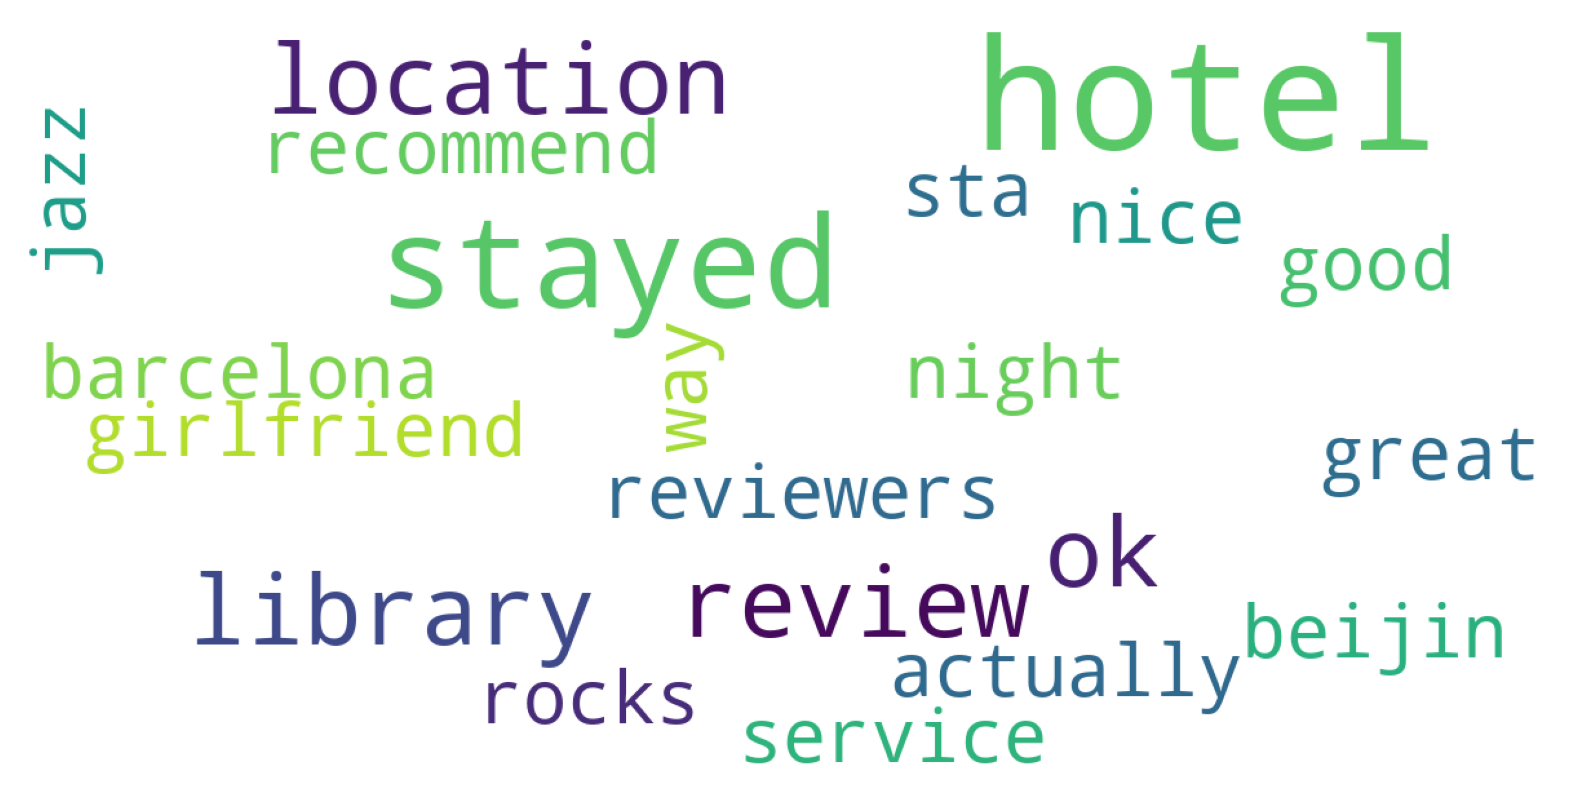

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 21,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(reviews_df["Review"])

Highest positive sentiment analysis reviews(with mode than 5 words)

In [ ]:
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Review", "pos"]].head(10)

,Review,pos
4073,hotel great hotel great money clean good restu...,0.799
2346,"best hotel, hotel gorgeous, beautiful clean sp...",0.763
12988,"just great, recently stayed clarendon great st...",0.746
14475,"great star hotel great value, rooms pretty sma...",0.741
5566,excellent value great staff glad choose hotel ...,0.738
18668,"fabulous hotel great hotel, rooms amazing larg...",0.733
8937,"excellent, great hotel, recommended couples, p...",0.721
11753,adore place clean spacious rooms extremely nic...,0.717
8122,"loved regina perfect great location, lovely cl...",0.711
12044,lovely room great location stayed 2004. lovely...,0.709


Lowest negative sentiment reviews(with more than 5 words)

In [ ]:
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["Review", "neg"]].head(10)

,Review,neg
9514,bad hotel really awful place dirty room rude s...,0.646
19891,"bad bad bad hotel verry bad pls not stay, clos...",0.645
42,warwick bad good reviews warwick shocks staff ...,0.458
14744,"stay away, worst resort, stayed 11 days 11 day...",0.437
12123,"awful hotel, no way 4.5 star hotel like 1 star...",0.431
10952,hotel gets 3 stars hell 4 5 star venue depress...,0.431
2408,"horrifying, stayed hotel october 2004 not filt...",0.424
6433,"disappointing disappointed stay benjamin, orig...",0.399
3979,"place pretty bad, rooms damp dirty, water line...",0.396
3470,bad spa 7 days spent huge family 30+guests thi...,0.391


Count of good and bad reviews

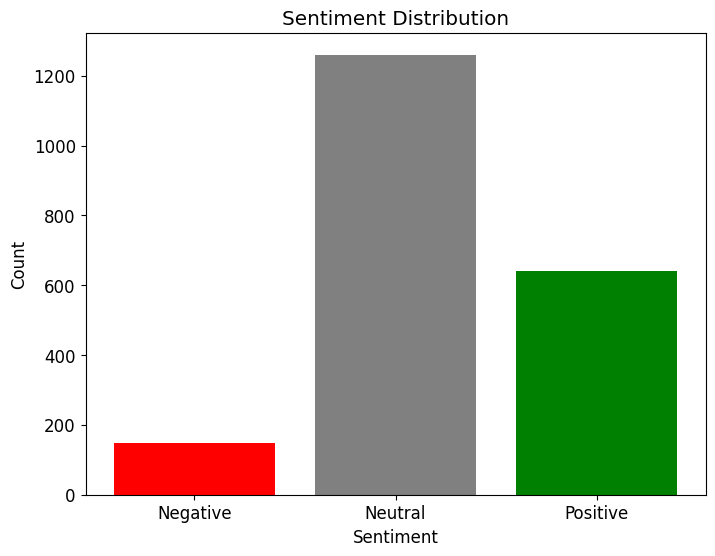

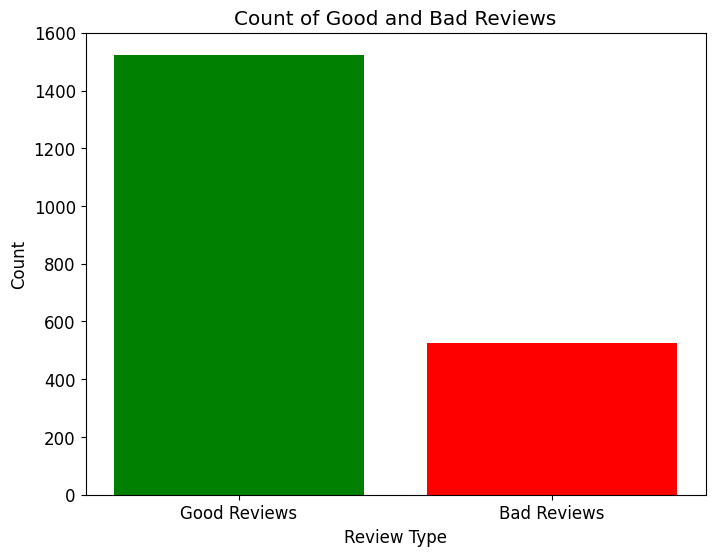

In [ ]:
sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_counts = [
    reviews_df['neg'].sum(),
    reviews_df['neu'].sum(),
    reviews_df['pos'].sum()
]

plt.figure(figsize=(8, 6))
plt.bar(sentiment_labels, sentiment_counts, color=['red', 'gray', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Bar chart for count of good and bad reviews
review_labels = ['Good Reviews', 'Bad Reviews']
review_counts = [
    reviews_df[reviews_df['is_bad_review'] == 0]['is_bad_review'].count(),
    reviews_df[reviews_df['is_bad_review'] == 1]['is_bad_review'].count()
]

plt.figure(figsize=(8, 6))
plt.bar(review_labels, review_counts, color=['green', 'red'])
plt.title('Count of Good and Bad Reviews')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [ ]:
# Check and download NLTK data if necessary
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Read data file as data

In [ ]:
data = pd.read_excel('Yeti Analytics.xlsx')

Making another column as bad review for checking

In [ ]:
data["is_bad_review"] = data["Rating"].apply(lambda x: 1 if x < 4 else 0)
reviews_df = data[["Review", "is_bad_review"]]

Sample reviews for faster computations

In [ ]:
reviews_df = reviews_df.sample(frac=0.1, replace=False, random_state=42)

Remove 'No Negative' or 'No Positive' from text

In [ ]:
reviews_df["Review"] = reviews_df["Review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

Cleaning text

In [ ]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
def clean_text(text):
    text = text.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(c.isdigit() for c in word)]
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    text = [t for t in text if len(t) > 0]
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = [t for t in text if len(t) > 1]
    text = " ".join(text)
    return text

In [ ]:
reviews_df["review_clean"] = reviews_df["Review"].apply(clean_text)

Adding sentiment analysis columns

In [ ]:
sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["Review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

Feature engineering

In [ ]:
reviews_df["nb_chars"] = reviews_df["Review"].apply(lambda x: len(x))
reviews_df["nb_words"] = reviews_df["Review"].apply(lambda x: len(x.split(" ")))

Tokenization

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews_df["review_clean"])
total_words = len(tokenizer.word_index) + 1

Splitting data into training and testing sets

In [ ]:
X = tokenizer.texts_to_sequences(reviews_df["review_clean"])
X = pad_sequences(X)
y = reviews_df["is_bad_review"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creating the LSTM model

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=X.shape[1]))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1409, 100)         1353000   
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,470,377
Trainable params: 1,470,377
Non-trainable params: 0
_________________________________________________________________


Training the model

In [ ]:
epochs = 10
batch_size = 64

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stop])

Epoch 1/10
21/21 [==============================] - 56s 3s/step - loss: 0.6246 - accuracy: 0.7285 - val_loss: 0.5755 - val_accuracy: 0.7378
Epoch 2/10
21/21 [==============================] - 54s 3s/step - loss: 0.4952 - accuracy: 0.7452 - val_loss: 0.4985 - val_accuracy: 0.7378
Epoch 3/10
21/21 [==============================] - 54s 3s/step - loss: 0.2811 - accuracy: 0.8696 - val_loss: 0.4420 - val_accuracy: 0.8201
Epoch 4/10
21/21 [==============================] - 55s 3s/step - loss: 0.2239 - accuracy: 0.9344 - val_loss: 0.4890 - val_accuracy: 0.7591
Epoch 5/10
21/21 [==============================] - 56s 3s/step - loss: 0.1114 - accuracy: 0.9626 - val_loss: 0.5482 - val_accuracy: 0.7957
Epoch 6/10
21/21 [==============================] - 56s 3s/step - loss: 0.0395 - accuracy: 0.9931 - val_loss: 0.6949 - val_accuracy: 0.7957
Epoch 6: early stopping


Evaluting the model

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f" % (accuracy * 100))

13/13 [==============================] - 6s 493ms/step - loss: 0.6446 - accuracy: 0.8024
Accuracy: 80.24


Plotting the accuracy and loss during training

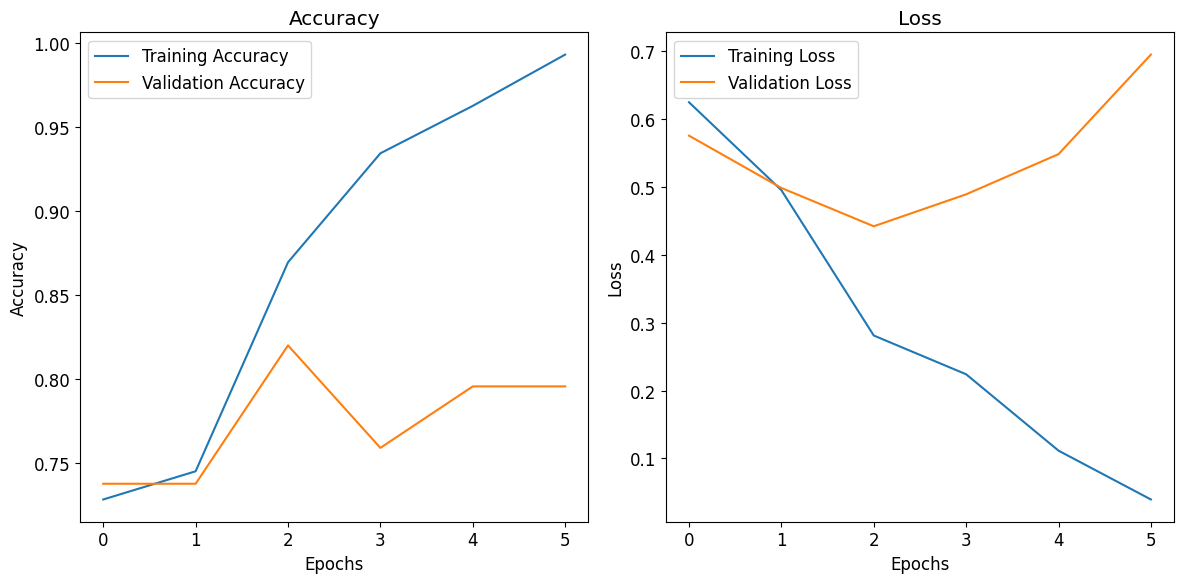

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()